找到 10 个最新的文件夹：
/media/kc401/diskA/CQ/deeplearning/MVRADAR/save_model/all/attention/DScombine/2024-12-15_23-31-20 (时间: 2024-12-15 23:31:20)
/media/kc401/diskA/CQ/deeplearning/MVRADAR/save_model/all/attention/DScombine/2024-12-15_23-19-48 (时间: 2024-12-15 23:19:48)
/media/kc401/diskA/CQ/deeplearning/MVRADAR/save_model/all/attention/DScombine/2024-12-15_23-08-25 (时间: 2024-12-15 23:08:25)
/media/kc401/diskA/CQ/deeplearning/MVRADAR/save_model/all/attention/DScombine/2024-12-15_22-56-48 (时间: 2024-12-15 22:56:48)
/media/kc401/diskA/CQ/deeplearning/MVRADAR/save_model/all/attention/DScombine/2024-12-15_22-45-25 (时间: 2024-12-15 22:45:25)
/media/kc401/diskA/CQ/deeplearning/MVRADAR/save_model/all/attention/DScombine/2024-12-15_22-34-05 (时间: 2024-12-15 22:34:05)
/media/kc401/diskA/CQ/deeplearning/MVRADAR/save_model/all/attention/DScombine/2024-12-15_22-22-34 (时间: 2024-12-15 22:22:34)
/media/kc401/diskA/CQ/deeplearning/MVRADAR/save_model/all/attention/DScombine/2024-12-15_22-11-13 (时间: 2024-12-15 22:

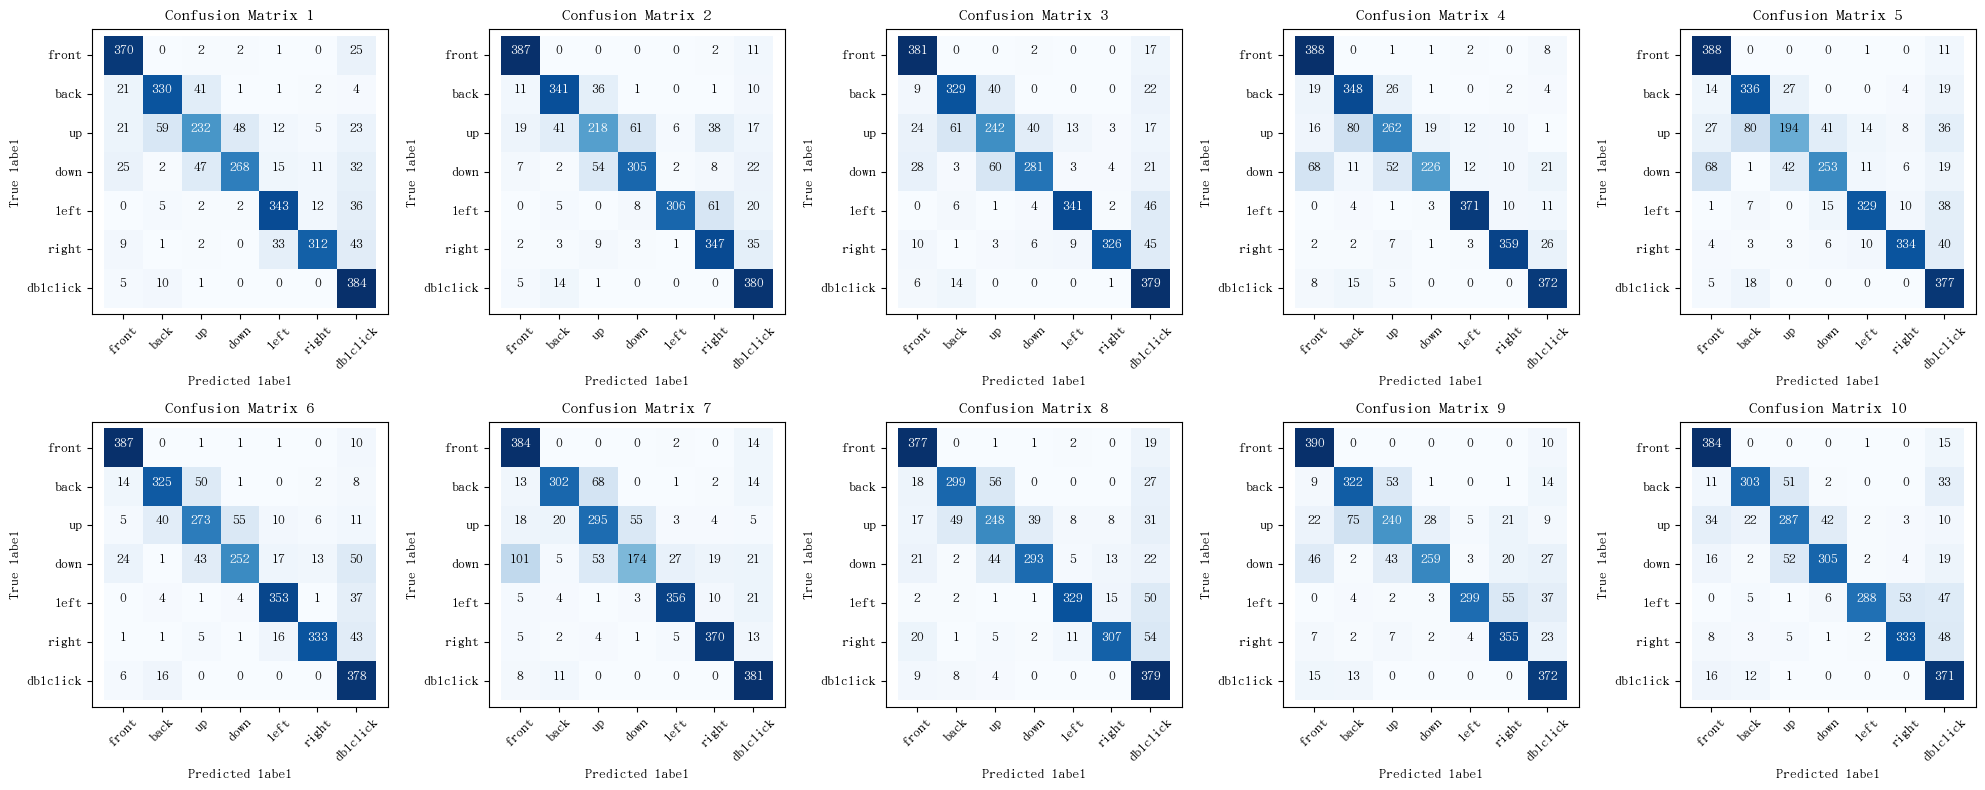

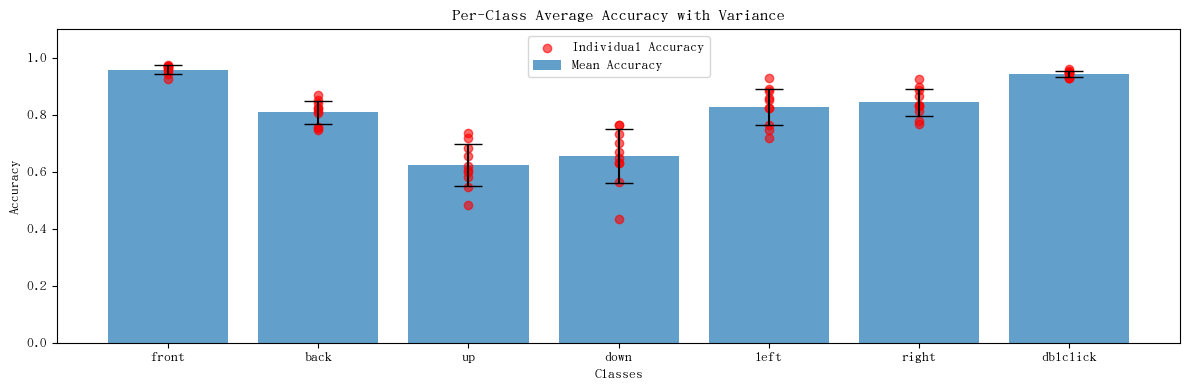

In [24]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

"""
plot_confusion_matrices.py

此脚本递归查找 `save_model` 文件夹下所有以 `%Y-%m-%d_%H-%M-%S` 格式命名的文件夹，找到最新的前 10 个，
在每个文件夹的 `output` 子文件夹中找到 `confusion_matrix.txt` 文件，读取并处理混淆矩阵，
绘制混淆矩阵图表，并统计每一类的平均准确率和方差，最后绘制带有误差棒和散点的直方图。

用法：
    python plot_confusion_matrices.py --save_model_path /path/to/save_model
"""

import os
import re
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

# 设置中文字体（可选，如果需要显示中文）
import matplotlib
from matplotlib.font_manager import FontProperties

# 配置 matplotlib 使用支持中文的字体
# 请根据你的系统安装的字体名称进行调整，例如 'SimHei', 'Noto Sans CJK SC', etc.
# 如果不需要显示中文，可以忽略这部分
try:
    matplotlib.rcParams['font.family'] = 'AR PL UKai CN'  # 使用黑体
    matplotlib.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
except:
    print("未找到指定的中文字体，使用默认字体。")

def find_timestamped_dirs(base_dir, pattern=r'\d{4}-\d{2}-\d{2}_\d{2}-\d{2}-\d{2}'):
    """
    递归查找 base_dir 下所有符合时间命名格式的文件夹。

    Args:
        base_dir (str): 基础目录路径。
        pattern (str): 正则表达式模式，用于匹配文件夹名称。

    Returns:
        list of tuples: 每个元组包含文件夹路径和对应的 datetime 对象。
    """
    dirs = []
    for root, dirs_, files in os.walk(base_dir):
        for d in dirs_:
            if re.fullmatch(pattern, d):
                try:
                    dt = datetime.strptime(d, "%Y-%m-%d_%H-%M-%S")
                    dirs.append((os.path.join(root, d), dt))
                except ValueError:
                    continue
    return dirs

def load_confusion_matrix(file_path):
    """
    从给定的文件路径加载混淆矩阵。

    假设 `confusion_matrix.txt` 是以空格分隔的数值文本文件。

    Args:
        file_path (str): 混淆矩阵文件路径。

    Returns:
        np.ndarray: 混淆矩阵数组。
    """
    try:
        # 使用 delim_whitespace=True 处理以空格分隔的文件
        cm = pd.read_csv(file_path, header=None,  sep=r'\s+').values
        # 确保矩阵为整数类型
        cm = cm.astype(int)
        return cm
    except Exception as e:
        print(f"无法读取文件 {file_path}: {e}")
        return None

def reorder_confusion_matrix(cm, order=[3,0,6,2,4,5,1]):
    """
    按照指定的顺序重新排列混淆矩阵的行和列。

    Args:
        cm (np.ndarray): 原始混淆矩阵。
        order (list of int): 重新排列的索引顺序。

    Returns:
        np.ndarray: 重新排列后的混淆矩阵。
    """
    try:
        cm_reordered = cm[np.ix_(order, order)]
        return cm_reordered
    except IndexError as e:
        print(f"重新排列混淆矩阵时出错: {e}")
        return cm

def plot_confusion_matrices(cms, classes, normalize=False, cmap=plt.cm.Blues):
    """
    绘制多个混淆矩阵，排列为 2 行 5 列。

    Args:
        cms (list of np.ndarray): 混淆矩阵列表。
        classes (list of str): 类别名称列表。
        normalize (bool): 是否归一化。
        cmap: 颜色映射。
    """
    num_matrices = len(cms)
    rows = 2
    cols = 5
    fig, axes = plt.subplots(rows, cols, figsize=(20, 8))
    axes = axes.flatten()
    for idx, cm in enumerate(cms):
        if idx >= rows * cols:
            break  # 只绘制前 rows*cols 个混淆矩阵
        ax = axes[idx]
        if normalize:
            cm_display = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        else:
            cm_display = cm
        im = ax.imshow(cm_display, interpolation='nearest', cmap=cmap)
        ax.set_title(f'Confusion Matrix {idx+1}')
        tick_marks = np.arange(len(classes))
        ax.set_xticks(tick_marks)
        ax.set_yticks(tick_marks)
        ax.set_xticklabels(classes, rotation=45)
        ax.set_yticklabels(classes)
        ax.set_ylabel('True label')
        ax.set_xlabel('Predicted label')

        # 添加数值标签
        thresh = cm_display.max() / 2.
        for i, j in itertools.product(range(cm_display.shape[0]), range(cm_display.shape[1])):
            num = f"{cm_display[i, j]:.2f}" if normalize else f"{int(cm_display[i, j])}"
            ax.text(j, i, num,
                    horizontalalignment="center",
                    color="white" if cm_display[i, j] > thresh else "black")

        # 调整布局
        ax.axis("equal")

    # 删除多余的子图（如果有）
    for idx in range(len(cms), len(axes)):
        fig.delaxes(axes[idx])

    plt.tight_layout()
    plt.show()

def compute_accuracy(cm):
    """
    计算每一类的准确率（对角线元素除以该行总和）。

    Args:
        cm (np.ndarray): 混淆矩阵。

    Returns:
        list of float: 每一类的准确率。
    """
    with np.errstate(all='ignore'):
        accuracy = np.diag(cm) / cm.sum(axis=1)
    return accuracy.tolist()

def plot_accuracy_histogram(mean_acc, std_acc, all_acc, classes):
    """
    绘制每一类的平均准确率直方图，带误差棒和散点。

    Args:
        mean_acc (list of float): 每一类的平均准确率。
        std_acc (list of float): 每一类的准确率标准差。
        all_acc (list of list of float): 所有运行中每一类的准确率。
        classes (list of str): 类别名称列表。
    """
    x = np.arange(len(classes))
    fig, ax = plt.subplots(figsize=(12, 4))

    # 绘制柱形图
    ax.bar(x, mean_acc, yerr=std_acc, align='center', alpha=0.7, ecolor='black', capsize=10, label='Mean Accuracy')

    # 绘制散点
    for i, class_acc in enumerate(zip(*all_acc)):
        ax.scatter([x[i]] * len(class_acc), class_acc, color='red', alpha=0.6, label='Individual Accuracy' if i == 0 else "")

    ax.set_xlabel('Classes')
    ax.set_ylabel('Accuracy')
    ax.set_title('Per-Class Average Accuracy with Variance')
    ax.set_xticks(x)
    ax.set_xticklabels(classes)
    ax.set_ylim(0, 1.1)
    ax.legend()

    plt.tight_layout()
    plt.show()

def main(save_model_base_dir, start, stop):
    # 配置
    
    confusion_matrix_filename = 'confusion_matrix.txt'
    top_n = 10  # 取最新的前 10 个文件夹
    class_order = [3, 0, 6, 2, 4, 5, 1]  # ['front', 'back', 'up', 'down', 'left', 'right','dblclick']
    reordered_classes = ['front', 'back', 'up', 'down', 'left', 'right', 'dblclick']

    # 查找符合时间命名格式的文件夹
    dirs = find_timestamped_dirs(save_model_base_dir)
    if not dirs:
        print(f"在目录 {save_model_base_dir} 下未找到符合命名格式的文件夹。")
        return

    # 按时间排序，最新的在前
    dirs_sorted = sorted(dirs, key=lambda x: x[1], reverse=True)
    top_dirs = dirs_sorted[start:stop]
    print(f"找到 {len(top_dirs)} 个最新的文件夹：")
    for d, dt in top_dirs:
        print(f"{d} (时间: {dt})")

    # 加载混淆矩阵
    cms = []
    all_accuracies = []
    for dir_path, dt in top_dirs:
        cm_path = os.path.join(dir_path, 'output', confusion_matrix_filename)
        if os.path.isfile(cm_path):
            cm = load_confusion_matrix(cm_path)
            if cm is not None:
                # 检查矩阵形状是否为 (7,7)
                if cm.shape != (7, 7):
                    print(f"文件 {cm_path} 的形状为 {cm.shape}，预期为 (7, 7)。尝试调整形状。")
                    # 尝试将 (7,1) 转换为 (7,) 然后重新排列
                    if cm.shape[1] == 1:
                        cm = cm.flatten()
                        # 假设每行都有7个元素，重新分割
                        cm = np.array([list(map(int, row.split())) for row in cm]).reshape(7, 7)
                cm_reordered = reorder_confusion_matrix(cm, order=class_order)
                cms.append(cm_reordered)
                acc = compute_accuracy(cm_reordered)
                all_accuracies.append(acc)
        else:
            print(f"文件不存在: {cm_path}")

    if not cms:
        print("未找到任何有效的混淆矩阵文件。")
        return

    # 确保有 10 个混淆矩阵
    print(f"成功加载 {len(cms)} 个混淆矩阵。")

    # 绘制混淆矩阵
    plot_confusion_matrices(cms, reordered_classes, normalize=False, cmap=plt.cm.Blues)

    # 计算每一类的平均准确率和标准差
    all_accuracies = np.array(all_accuracies)  # 形状: (num_runs, num_classes)
    mean_acc = np.mean(all_accuracies, axis=0)
    std_acc = np.std(all_accuracies, axis=0)

    # 绘制准确率直方图
    plot_accuracy_histogram(mean_acc, std_acc, all_accuracies, reordered_classes)

if __name__ == "__main__":
    save_model_base_dir = '/media/kc401/diskA/CQ/deeplearning/MVRADAR/save_model/all/attention/DScombine'  # 修改为你的 save_model 文件夹路径
    main(save_model_base_dir,0, 10)


找到 10 个最新的文件夹：
/media/kc401/diskA/CQ/deeplearning/MVRADAR/save_model/all/attention/linear_projection/2024-12-13_22-15-10 (时间: 2024-12-13 22:15:10)
/media/kc401/diskA/CQ/deeplearning/MVRADAR/save_model/all/attention/linear_projection/2024-12-13_22-04-07 (时间: 2024-12-13 22:04:07)
/media/kc401/diskA/CQ/deeplearning/MVRADAR/save_model/all/attention/linear_projection/2024-12-13_21-53-07 (时间: 2024-12-13 21:53:07)
/media/kc401/diskA/CQ/deeplearning/MVRADAR/save_model/all/attention/linear_projection/2024-12-13_21-42-07 (时间: 2024-12-13 21:42:07)
/media/kc401/diskA/CQ/deeplearning/MVRADAR/save_model/all/attention/linear_projection/2024-12-13_21-31-04 (时间: 2024-12-13 21:31:04)
/media/kc401/diskA/CQ/deeplearning/MVRADAR/save_model/all/attention/linear_projection/2024-12-13_21-20-07 (时间: 2024-12-13 21:20:07)
/media/kc401/diskA/CQ/deeplearning/MVRADAR/save_model/all/attention/linear_projection/2024-12-13_21-08-55 (时间: 2024-12-13 21:08:55)
/media/kc401/diskA/CQ/deeplearning/MVRADAR/save_model/all/att

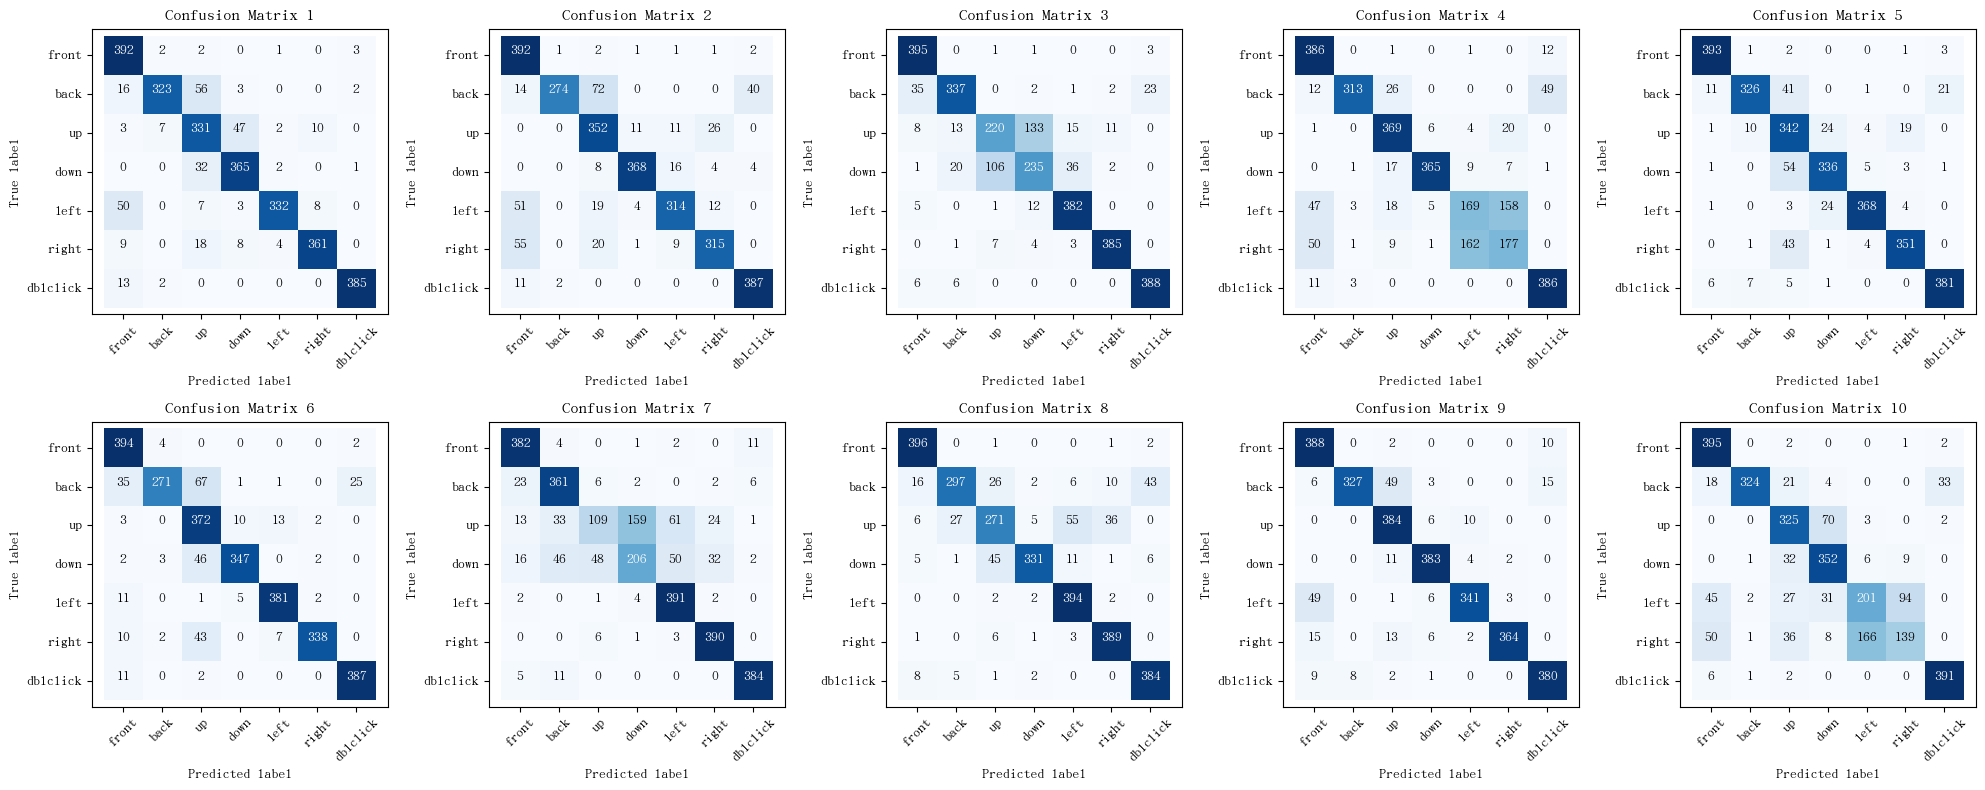

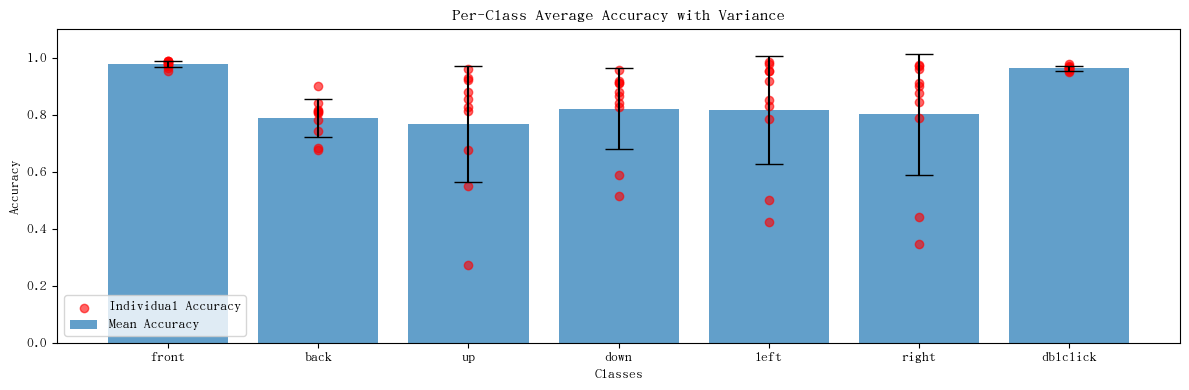

In [16]:
main(save_model_base_dir,10, 20)